In [1]:
#import the libraries
import pandas as pd
import numpy as np

In [2]:
#read the data
cr7 = pd.read_csv('D:/IMS Proschool/Business Analytics/Practice/Self/Cristano_Ronaldo_Final_v1/cr7.csv',index_col=0)

In [3]:
#drop the irrelevant tables
cr7 = cr7.drop(['distance_of_shot.1','knockout_match.1','power_of_shot.1','remaining_min.1','remaining_sec.1','match_event_id','match_id','team_id','team_name','date_of_game'],axis=1)

In [4]:
#impute missing values
cr7['distance_of_shot'] = cr7['distance_of_shot'].fillna(cr7['distance_of_shot'].median())
#cr7['date_of_game'] = cr7['date_of_game'].fillna(axis=0, method='ffill')
cr7['game_season'] = cr7['game_season'].fillna(axis=0, method='ffill')
cr7['home/away'] = cr7['home/away'].fillna(axis=0, method='ffill')
cr7['knockout_match'] = cr7['knockout_match'].fillna(axis=0, method='ffill')
cr7['lat/lng'] = cr7['lat/lng'].fillna(axis=0, method='ffill')
cr7['location_x'] = cr7['location_x'].fillna(cr7['location_x'].median())
cr7['location_y'] = cr7['location_y'].fillna(0)
cr7['power_of_shot'] = cr7['power_of_shot'].fillna(axis=0, method='ffill')
cr7['remaining_min'] = cr7['remaining_min'].fillna(cr7['remaining_min'].median())
cr7['remaining_sec'] = cr7['remaining_sec'].fillna(cr7['remaining_sec'].median())
cr7['shot_id_number'] = cr7['shot_id_number'].ffill()+cr7.groupby(cr7['shot_id_number'].notnull().cumsum()).cumcount()/1

for col in ['area_of_shot','range_of_shot','shot_basics','type_of_shot','type_of_combined_shot']:
    cr7[col].fillna(cr7[col].mode()[0], inplace=True)

In [5]:
cr7.head()

,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,date_of_game,home/away,shot_id_number,lat/lng,type_of_shot,type_of_combined_shot
0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,NaN,Right Side(R),Mid Range,16-24 ft.,31-10-00,MANU @ POR,1.0,"45.539131, -122.651648",shot - 30,shot - 3
1,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,0.0,Left Side(L),Mid Range,8-16 ft.,31-10-00,MANU @ POR,2.0,"45.539131, -122.651648",shot - 45,shot - 3
2,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,1.0,Left Side Center(LC),Mid Range,16-24 ft.,31-10-00,MANU @ POR,3.0,"45.539131, -122.651648",shot - 25,shot - 3
3,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,0.0,Right Side Center(RC),Mid Range,16-24 ft.,31-10-00,MANU @ POR,4.0,"45.539131, -122.651648",shot - 39,shot - 3
4,0.0,0.0,5.0,2.0,0.0,2000-01,19.0,20.0,1.0,Center(C),Goal Area,Less Than 8 ft.,31-10-00,MANU @ POR,5.0,"45.539131, -122.651648",shot - 39,shot - 1


In [6]:
cr7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30697 entries, 0 to 30696
Data columns (total 18 columns):
location_x               30697 non-null float64
location_y               30697 non-null float64
remaining_min            30697 non-null float64
power_of_shot            30697 non-null float64
knockout_match           30697 non-null float64
game_season              30697 non-null object
remaining_sec            30697 non-null float64
distance_of_shot         30697 non-null float64
is_goal                  24429 non-null float64
area_of_shot             30697 non-null object
shot_basics              30697 non-null object
range_of_shot            30697 non-null object
date_of_game             30697 non-null object
home/away                30697 non-null object
shot_id_number           30697 non-null float64
lat/lng                  30697 non-null object
type_of_shot             30697 non-null object
type_of_combined_shot    30697 non-null object
dtypes: float64(9), object(9)
memory

In [7]:
cr7.shape

(30697, 18)

In [5]:
cr7['Home or Away'] = cr7['home/away'].str.extract('([a-z]+)\.', expand=False)

In [6]:
cr7['Home or Away'] = cr7['Home or Away'].replace('vs','Home')

In [7]:
cr7['Home or Away'] = cr7['Home or Away'].fillna('Away')

In [13]:
cr7.head()

,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,date_of_game,home/away,shot_id_number,lat/lng,type_of_shot,type_of_combined_shot,Home or Away
0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,NaN,Right Side(R),Mid Range,16-24 ft.,31-10-00,MANU @ POR,1.0,"45.539131, -122.651648",shot - 30,shot - 3,Away
1,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,0.0,Left Side(L),Mid Range,8-16 ft.,31-10-00,MANU @ POR,2.0,"45.539131, -122.651648",shot - 45,shot - 3,Away
2,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,1.0,Left Side Center(LC),Mid Range,16-24 ft.,31-10-00,MANU @ POR,3.0,"45.539131, -122.651648",shot - 25,shot - 3,Away
3,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,0.0,Right Side Center(RC),Mid Range,16-24 ft.,31-10-00,MANU @ POR,4.0,"45.539131, -122.651648",shot - 39,shot - 3,Away
4,0.0,0.0,5.0,2.0,0.0,2000-01,19.0,20.0,1.0,Center(C),Goal Area,Less Than 8 ft.,31-10-00,MANU @ POR,5.0,"45.539131, -122.651648",shot - 39,shot - 1,Away


In [14]:
cr7

,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,date_of_game,home/away,shot_id_number,lat/lng,type_of_shot,type_of_combined_shot,Home or Away
0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,NaN,Right Side(R),Mid Range,16-24 ft.,31-10-00,MANU @ POR,1.0,"45.539131, -122.651648",shot - 30,shot - 3,Away
1,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,0.0,Left Side(L),Mid Range,8-16 ft.,31-10-00,MANU @ POR,2.0,"45.539131, -122.651648",shot - 45,shot - 3,Away
2,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,1.0,Left Side Center(LC),Mid Range,16-24 ft.,31-10-00,MANU @ POR,3.0,"45.539131, -122.651648",shot - 25,shot - 3,Away
3,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,0.0,Right Side Center(RC),Mid Range,16-24 ft.,31-10-00,MANU @ POR,4.0,"45.539131, -122.651648",shot - 39,shot - 3,Away
4,0.0,0.0,5.0,2.0,0.0,2000-01,19.0,20.0,1.0,Center(C),Goal Area,Less Than 8 ft.,31-10-00,MANU @ POR,5.0,"45.539131, -122.651648",shot - 39,shot - 1,Away
5,-145.0,-11.0,9.0,3.0,0.0,2000-01,32.0,34.0,0.0,Left Side(L),Mid Range,8-16 ft.,31-10-00,MANU @ POR,6.0,"45.539131, -122.651648",shot - 17,shot - 3,Away
6,0.0,0.0,8.0,3.0,0.0,2000-01,52.0,20.0,1.0,Center(C),Goal Area,Less Than 8 ft.,31-10-00,MANU @ POR,7.0,"45.539131, -122.651648",shot - 39,shot - 4,Away
7,1.0,28.0,8.0,3.0,0.0,2000-01,5.0,22.0,NaN,Center(C),Goal Area,Less Than 8 ft.,31-10-00,MANU @ POR,8.0,"45.539131, -122.651648",shot - 39,shot - 3,Away
8,-65.0,0.0,6.0,3.0,0.0,2000-01,12.0,32.0,1.0,Left Side(L),Goal Line,8-16 ft.,31-10-00,MANU @ POR,9.0,"45.539131, -122.651648",shot - 36,shot - 3,Away
9,-33.0,0.0,3.0,3.0,0.0,2000-01,36.0,32.0,0.0,Center(C),Goal Line,8-16 ft.,31-10-00,MANU @ POR,10.0,"45.539131, -122.651648",shot - 44,shot - 3,Away


In [8]:
cr7 = cr7.drop(['home/away'], axis=1)

In [16]:
#cr7 = cr7.drop(['date_of_game'], axis=1)

In [9]:
cr7.shape

(30697, 17)

In [9]:
cr7_num = cr7[cr7.select_dtypes(include=[np.number]).columns.tolist()]
target_col = cr7['is_goal']
cr7_num = cr7_num.drop(['is_goal'], axis=1)
cr7_num.head()

,location_x,location_y,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,shot_id_number
0,167.0,72.0,10.0,1.0,0.0,27.0,38.0,1.0
1,-157.0,0.0,10.0,1.0,0.0,22.0,35.0,2.0
2,-101.0,135.0,7.0,1.0,0.0,45.0,36.0,3.0
3,138.0,175.0,6.0,1.0,0.0,52.0,42.0,4.0
4,0.0,0.0,5.0,2.0,0.0,19.0,20.0,5.0


In [10]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
scaled = std.fit_transform(cr7_num)
cr7_num_scaled = pd.DataFrame(scaled,columns=cr7_num.columns)
cr7_num_scaled.head()

,location_x,location_y,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,shot_id_number
0,1.486456,-0.165906,1.519457,-1.318574,-0.414404,-0.077143,0.489614,-1.731994
1,-1.524228,-0.986584,1.519457,-1.318574,-0.414404,-0.371073,0.161156,-1.731882
2,-1.003863,0.552188,0.627552,-1.318574,-0.414404,0.981003,0.270642,-1.731769
3,1.216981,1.008120,0.330250,-1.318574,-0.414404,1.392504,0.927557,-1.731656
4,-0.065347,-0.986584,0.032949,-0.451362,-0.414404,-0.547431,-1.481131,-1.731543


In [11]:
cr7_cat = cr7[cr7.select_dtypes(include=['object']).columns.tolist()]
cr7_cat.head()

,game_season,area_of_shot,shot_basics,range_of_shot,lat/lng,type_of_shot,type_of_combined_shot,Home or Away
0,2000-01,Right Side(R),Mid Range,16-24 ft.,"45.539131, -122.651648",shot - 30,shot - 3,Away
1,2000-01,Left Side(L),Mid Range,8-16 ft.,"45.539131, -122.651648",shot - 45,shot - 3,Away
2,2000-01,Left Side Center(LC),Mid Range,16-24 ft.,"45.539131, -122.651648",shot - 25,shot - 3,Away
3,2000-01,Right Side Center(RC),Mid Range,16-24 ft.,"45.539131, -122.651648",shot - 39,shot - 3,Away
4,2000-01,Center(C),Goal Area,Less Than 8 ft.,"45.539131, -122.651648",shot - 39,shot - 1,Away


In [12]:
cr7_cat_cols = cr7.select_dtypes(include=['object']).columns.tolist()
cr7_cat_cols

['game_season',
 'area_of_shot',
 'shot_basics',
 'range_of_shot',
 'lat/lng',
 'type_of_shot',
 'type_of_combined_shot',
 'Home or Away']

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cr7_cat_cols :
    cr7_cat[i] = le.fit_transform(cr7_cat[i])

cr7_cat.head()

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,game_season,area_of_shot,shot_basics,range_of_shot,lat/lng,type_of_shot,type_of_combined_shot,Home or Away
0,4,5,4,0,34,24,3,0
1,4,2,4,2,34,40,3,0
2,4,1,4,0,34,18,3,0
3,4,4,4,0,34,33,3,0
4,4,0,0,4,34,33,1,0


In [14]:
cr7_comb = pd.concat([cr7_num_scaled, cr7_cat, target_col], axis=1)
cr7_comb.head()

,location_x,location_y,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,shot_id_number,game_season,area_of_shot,shot_basics,range_of_shot,lat/lng,type_of_shot,type_of_combined_shot,Home or Away,is_goal
0,1.486456,-0.165906,1.519457,-1.318574,-0.414404,-0.077143,0.489614,-1.731994,4,5,4,0,34,24,3,0,NaN
1,-1.524228,-0.986584,1.519457,-1.318574,-0.414404,-0.371073,0.161156,-1.731882,4,2,4,2,34,40,3,0,0.0
2,-1.003863,0.552188,0.627552,-1.318574,-0.414404,0.981003,0.270642,-1.731769,4,1,4,0,34,18,3,0,1.0
3,1.216981,1.008120,0.330250,-1.318574,-0.414404,1.392504,0.927557,-1.731656,4,4,4,0,34,33,3,0,0.0
4,-0.065347,-0.986584,0.032949,-0.451362,-0.414404,-0.547431,-1.481131,-1.731543,4,0,0,4,34,33,1,0,1.0


In [16]:
cr7_comb.shape

(30697, 17)

In [15]:
#separate the data into two parts, one as train set and the other as test set
#data with missing values in is_goal field will be test set
cr7_train = cr7_comb[(cr7_comb.is_goal.isna() == False)]
cr7_test = cr7_comb[(cr7_comb.is_goal.isna() == True)]

In [16]:
X = cr7_train.drop(['is_goal','shot_id_number'], axis=1)
y = cr7_train['is_goal']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1)

In [18]:
# build ML models for cross validation

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [19]:
# create objects of the model classifiers

lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=100)
knn = KNeighborsClassifier(n_neighbors=25)
nb = GaussianNB()
xgb = XGBClassifier()

In [20]:
# check cross validation scores (accuracy) for all the models

from sklearn.model_selection import cross_val_score

lr_score = cross_val_score(lr, X_train, y_train, cv=4, scoring='accuracy')
dt_score = cross_val_score(dt, X_train, y_train, cv=4, scoring='accuracy')
rf_score = cross_val_score(rf, X_train, y_train, cv=4, scoring='accuracy')
knn_score = cross_val_score(knn, X_train, y_train, cv=4, scoring='accuracy')
nb_score = cross_val_score(nb, X_train, y_train, cv=4, scoring='accuracy')
xgb_score = cross_val_score(xgb, X_train, y_train, cv=4, scoring='accuracy')

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [21]:
# print the scores

print('Logistic Regression: ',lr_score)
print('Decision Tree: ',dt_score)
print('Random Forest: ',rf_score)
print('K Nearest Neighbors: ',knn_score)
print('Naive Bayes: ',nb_score)
print('XGBoost: ',xgb_score)

Logistic Regression:  [0.59320647 0.58534589 0.59344933 0.60020471]
Decision Tree:  [0.5584203  0.5487106  0.53981576 0.5482088 ]
Random Forest:  [0.60568856 0.60397053 0.61023541 0.61125896]
K Nearest Neighbors:  [0.58522611 0.58657388 0.59037871 0.59385875]
Naive Bayes:  [0.60527931 0.59148588 0.59713408 0.60266121]
XGBoost:  [0.62369552 0.6230045  0.62395087 0.62927329]


In [22]:
#check the mean and standard deviation of the scores to select the best model

#mean
l = lr_score.mean()
d = dt_score.mean()
r = rf_score.mean()
k = knn_score.mean()
n = nb_score.mean()
x = xgb_score.mean()

# stdev
l_s = lr_score.std()
d_s = dt_score.std()
r_s = rf_score.std()
k_s = knn_score.std()
n_s = nb_score.std()
x_s = xgb_score.std()

In [23]:
# print the results in an order

res = pd.DataFrame(
        {
        'Model':['Logistic Regression','Decision Tree','Random Forest','K Nearest Neighbors','Naive Bayes','XGBoost'],
        'Accuracy':[l,d,r,k,n,x],
        'Stdev':[l_s, d_s, r_s, k_s, n_s, x_s]
        }   )
average_scores = res.sort_values(by='Accuracy', ascending=False)
average_scores

,Model,Accuracy,Stdev
5,XGBoost,0.624981,0.002502
2,Random Forest,0.607788,0.003042
4,Naive Bayes,0.599140,0.005308
0,Logistic Regression,0.593052,0.005261
3,K Nearest Neighbors,0.589009,0.003378
1,Decision Tree,0.548789,0.006588


In [24]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

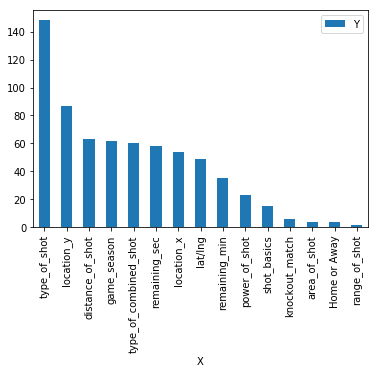

In [27]:
#Feature Importance

import matplotlib.pyplot as plt
%matplotlib inline
fscores = pd.DataFrame({'X': list(xgb.get_booster().get_fscore().keys()), 'Y': list(xgb.get_booster().get_fscore().values())})
fscores.sort_values(by='Y', ascending=False).plot.bar(x='X')
plt.show()

In [28]:
fscores.sort_values(by='Y', ascending=False)

,X,Y
1,type_of_shot,148
6,location_y,87
0,distance_of_shot,63
8,game_season,62
3,type_of_combined_shot,60
9,remaining_sec,58
2,location_x,54
5,lat/lng,49
7,remaining_min,35
10,power_of_shot,23


In [29]:
y_pred = xgb.predict(X_test)

In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.62      0.82      0.70      2704
         1.0       0.62      0.37      0.46      2182

   micro avg       0.62      0.62      0.62      4886
   macro avg       0.62      0.59      0.58      4886
weighted avg       0.62      0.62      0.60      4886



In [32]:
print('Accuracy: ',np.round(accuracy_score(y_test, y_pred),3))
print('Precision: ',np.round(precision_score(y_test, y_pred),3))
print('Recall: ',np.round(recall_score(y_test, y_pred),3))
print('F1: ',np.round(f1_score(y_test, y_pred),3))

roc_score = roc_auc_score(y_test, y_pred)
roc_score = np.round(roc_score,3)
print('ROC AUC: ',roc_score)

Accuracy:  0.618
Precision:  0.622
Recall:  0.367
F1:  0.462
ROC AUC:  0.593


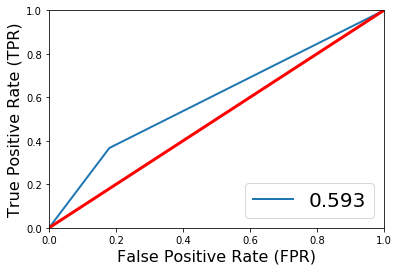

In [33]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, linewidth=2, label=roc_score)
plt.plot([0, 1], [0, 1], 'r', linewidth=3)
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate (FPR)', fontsize=16)
plt.ylabel('True Positive Rate (TPR)', fontsize=16)
plt.legend(loc='lower right', prop={'size':20})
plt.show()

In [26]:
from bayes_opt import BayesianOptimization

In [37]:
#Bayesian Optimization function for xgboost, maximizing recall_score
def xgb_evaluate(max_depth, n_estimators, learning_rate):
    params = {'max_depth': int(max_depth),
              'n_estimators': int(n_estimators),
              'learning_rate': learning_rate}
    model = XGBClassifier(**params)
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    return recall_score(y_test,pred)

In [27]:
# bounds / parameter list for optimization

bounds = {'max_depth': (3,10),
          'n_estimators': (50,500),
          'learning_rate': (0.01,0.1)}

In [38]:
optimizer = BayesianOptimization(f=xgb_evaluate, pbounds=bounds, random_state=1, verbose=True)

In [39]:
optimizer.maximize(n_iter=100, init_points=10, acq='ei')

|   iter    |  target   | learni... | max_depth | n_esti... |
-------------------------------------------------------------
|  3        |  0.3501   |  0.02676  |  5.419    |  228.5    |
|  4        |  0.3786   |  0.05849  |  5.934    |  358.3    |
|  6        |  0.3854   |  0.07034  |  5.921    |  301.4    |
|  8        |  0.4138   |  0.09714  |  5.194    |  361.5    |
|  12       |  0.4308   |  0.1      |  10.0     |  153.1    |
|  15       |  0.4413   |  0.1      |  10.0     |  187.5    |
|  18       |  0.4633   |  0.1      |  10.0     |  480.5    |
|  21       |  0.4656   |  0.1      |  10.0     |  466.1    |
|  48       |  0.467    |  0.1      |  10.0     |  381.1    |


In [41]:
optimizer.max['params']

{'learning_rate': 0.1, 'max_depth': 10.0, 'n_estimators': 381.08765749531494}

In [42]:
params = optimizer.max['params']

In [43]:
#Converting the max_depth and n_estimator values from float to int
params['max_depth']= int(params['max_depth'])
params['n_estimators']= int(params['n_estimators'])

In [44]:
xgb = XGBClassifier(**params).fit(X_train,y_train)

In [45]:
y_pred = xgb.predict(X_test)

In [46]:
print(classification_report(y_test, y_pred))
print('Accuracy: ',np.round(accuracy_score(y_test, y_pred),3))
print('Precision: ',np.round(precision_score(y_test, y_pred),3))
print('Recall: ',np.round(recall_score(y_test, y_pred),3))
print('F1: ',np.round(f1_score(y_test, y_pred),3))

roc_score = roc_auc_score(y_test, y_pred)
roc_score = np.round(roc_score,3)
print('ROC AUC: ',roc_score)

              precision    recall  f1-score   support

         0.0       0.63      0.72      0.67      2704
         1.0       0.57      0.47      0.51      2182

   micro avg       0.61      0.61      0.61      4886
   macro avg       0.60      0.59      0.59      4886
weighted avg       0.60      0.61      0.60      4886

Accuracy:  0.606
Precision:  0.572
Recall:  0.467
F1:  0.514
ROC AUC:  0.593


In [61]:
#Bayesian Optimization function for xgboost, maximizing accuracy_score

def xgb_evaluate2(max_depth, n_estimators, learning_rate):
    params = {'max_depth': int(max_depth),
              'n_estimators': int(n_estimators),
              'learning_rate': learning_rate}
    model = XGBClassifier(**params)
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    return accuracy_score(y_test,pred)

In [62]:
optimizer2 = BayesianOptimization(f=xgb_evaluate2, pbounds=bounds, random_state=1, verbose=True)

In [63]:
optimizer2.maximize(n_iter=100, init_points=10, acq='ei')

|   iter    |  target   | learni... | max_depth | n_esti... |
-------------------------------------------------------------
|  3        |  0.6304   |  0.02676  |  5.419    |  228.5    |
|  57       |  0.6316   |  0.01277  |  6.599    |  294.2    |
|  92       |  0.6322   |  0.01245  |  7.219    |  297.2    |
|  95       |  0.6336   |  0.01105  |  6.642    |  397.9    |


In [64]:
params2 = optimizer2.max['params']
params2['max_depth']= int(params2['max_depth'])
params2['n_estimators']= int(params2['n_estimators'])
params2

{'learning_rate': 0.01104960781617254, 'max_depth': 6, 'n_estimators': 397}

In [65]:
xgb2 = XGBClassifier(**params2).fit(X_train,y_train)
y_pred2 = xgb2.predict(X_test)
print(classification_report(y_test, y_pred2))
print('Accuracy: ',np.round(accuracy_score(y_test, y_pred2),3))
print('Precision: ',np.round(precision_score(y_test, y_pred2),3))
print('Recall: ',np.round(recall_score(y_test, y_pred2),3))
print('F1: ',np.round(f1_score(y_test, y_pred2),3))

roc_score = roc_auc_score(y_test, y_pred2)
roc_score = np.round(roc_score,3)
print('ROC AUC: ',roc_score)

              precision    recall  f1-score   support

         0.0       0.62      0.86      0.72      2704
         1.0       0.67      0.36      0.47      2182

   micro avg       0.63      0.63      0.63      4886
   macro avg       0.65      0.61      0.59      4886
weighted avg       0.64      0.63      0.61      4886

Accuracy:  0.634
Precision:  0.668
Recall:  0.357
F1:  0.465
ROC AUC:  0.607


In [33]:
#Bayesian Optimization function for xgboost, maximizing roc_auc_score

def xgb_evaluate3(max_depth, n_estimators, learning_rate):
    params = {'max_depth': int(max_depth),
              'n_estimators': int(n_estimators),
              'learning_rate': learning_rate}
    model = XGBClassifier(**params)
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    return roc_auc_score(y_test,pred)

optimizer3 = BayesianOptimization(f=xgb_evaluate3, pbounds=bounds, random_state=1, verbose=True)

In [34]:
optimizer3.maximize(n_iter=100, init_points=10, acq='ei')

|   iter    |  target   | learni... | max_depth | n_esti... |
-------------------------------------------------------------
|  3        |  0.6033   |  0.02676  |  5.419    |  228.5    |
|  8        |  0.6058   |  0.09714  |  5.194    |  361.5    |
|  42       |  0.608    |  0.09139  |  4.688    |  343.5    |


In [35]:
params4 = optimizer3.max['params']
params4['max_depth']= int(params4['max_depth'])
params4['n_estimators']= int(params4['n_estimators'])
params4

{'learning_rate': 0.09138817318677032, 'max_depth': 4, 'n_estimators': 343}

In [60]:
xgb4 = XGBClassifier(**params4).fit(X_train,y_train)
y_pred4 = xgb4.predict(X_test)
print(classification_report(y_test, y_pred4))
print('Accuracy: ',np.round(accuracy_score(y_test, y_pred4),3))
print('Precision: ',np.round(precision_score(y_test, y_pred4),3))
print('Recall: ',np.round(recall_score(y_test, y_pred4),3))
print('F1: ',np.round(f1_score(y_test, y_pred4),3))

roc_score4 = roc_auc_score(y_test, y_pred4)
roc_score4 = np.round(roc_score4,3)
print('ROC AUC: ',roc_score4)

              precision    recall  f1-score   support

         0.0       0.63      0.82      0.71      2704
         1.0       0.64      0.39      0.49      2182

   micro avg       0.63      0.63      0.63      4886
   macro avg       0.63      0.61      0.60      4886
weighted avg       0.63      0.63      0.61      4886

Accuracy:  0.631
Precision:  0.641
Recall:  0.395
F1:  0.488
ROC AUC:  0.608


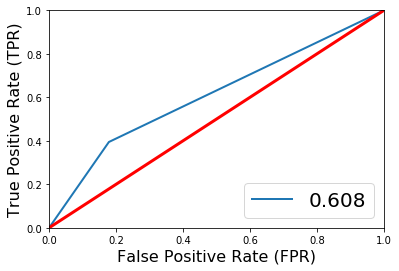

In [59]:
#plot Roc curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_pred4)
plt.plot(fpr, tpr, linewidth=2, label=roc_score4)
plt.plot([0, 1], [0, 1], 'r', linewidth=3)
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate (FPR)', fontsize=16)
plt.ylabel('True Positive Rate (TPR)', fontsize=16)
plt.legend(loc='lower right', prop={'size':20})
plt.show()

### According to our requirement, we can fit the best model of the respective to our original test set and submit the predictions

### Here we will fit the model with the best roc_auc_score

In [66]:
x_test = cr7_test.drop(['is_goal','shot_id_number'], axis=1)
y_pred_test = xgb4.predict(x_test)

In [71]:
#Submit predictions
submit = pd.DataFrame({'index':cr7_test.index, 'is_goal': y_pred_test})

In [72]:
#save the predictions as cr7_final_submission
submit.to_csv("D:/IMS Proschool/Business Analytics/Practice/Self/Cristano_Ronaldo_Final_v1/cr7_final_submission.csv", index=None)